In [1]:
import sys
sys.path.append("..")

import utils

import numpy as np
import matplotlib.pyplot as plt

In [2]:
eeg = utils.get_eeg_instance(0)

Extracting parameters from /home/david/eeg_informed_fmri/datasets/01/EEG/32/export/20130410320002_Segmentation_bin.vhdr...
Setting channel info structure...
Reading 0 ... 162022  =      0.000 ...   648.088 secs...


../utils.py:35: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  return mne.io.read_raw_brainvision(complete_path, preload=True)


### Compute FFT

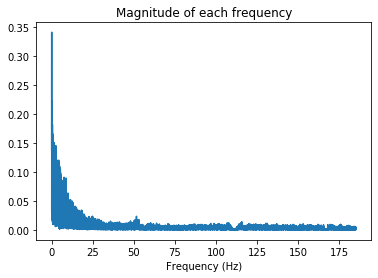

In [3]:
utils.plot_fft(eeg)

The plot above looks more like a normal EEG plot, this is because we removed the frequency 0.0Hz activity from the plot

### FFT of a 2 second window

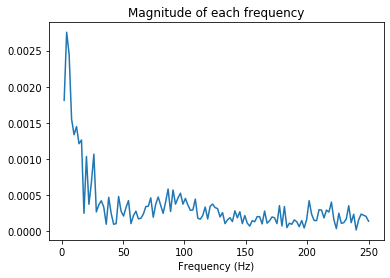

In [4]:
utils.plot_fft(eeg, start_time=0, stop_time=int(eeg.info['sfreq']*2))

Effective window size : 8.192 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


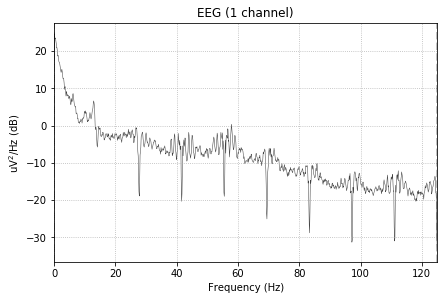

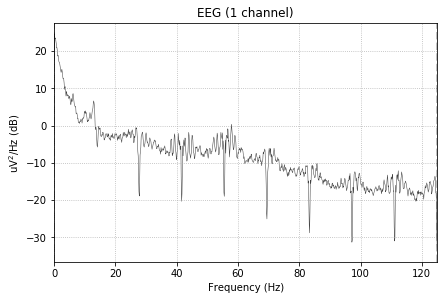

In [5]:
eeg.plot_psd(picks=1)

### Let's try and compute our own STFT with FFT per 2 second windows

In [6]:
f, Zxx, t = utils.stft(eeg, channel=2, fs=eeg.info['sfreq'], window_size=10)

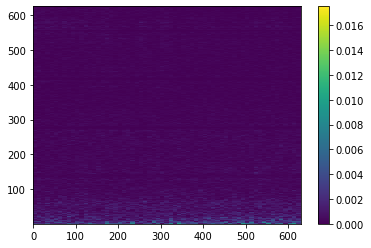

In [7]:
utils.plot_stft(eeg, channel=2, window_size=10, min_freq=None, max_freq=None)

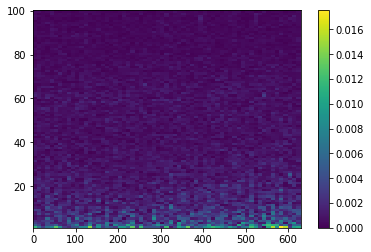

In [8]:
utils.plot_stft(eeg, channel=2, window_size=10, min_freq=None, max_freq=100)